# Data Preprocessing

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('raw_data.csv')
df.head()

,entrada,llegada_pico,salida,tiempo_cola,tiempo_servicio,tiempo_total
0,07:49:19,08:04:23,08:07:23,904,180,1084
1,07:54:32,08:12:37,08:14:48,1085,131,1216
2,07:57:45,08:04:20,08:10:45,395,385,780
3,08:00:00,08:10:48,08:15:06,648,258,906
4,07:06:33,07:27:54,07:34:34,1315,400,1715


In [28]:
df.describe()

,tiempo_cola,tiempo_servicio,tiempo_total
count,62.000000,62.000000,62.000000
mean,1644.725806,262.693548,1907.419355
std,563.563666,78.564704,579.777305
min,395.000000,83.000000,780.000000
25%,1251.250000,230.750000,1533.500000
50%,1637.000000,258.000000,1879.500000
75%,2170.250000,310.500000,2493.250000
max,2460.000000,460.000000,2745.000000


In [29]:
def to_datetime_or_na(series):
    return pd.to_datetime(series, format='%H:%M:%S', errors='coerce')

df_final = df.copy()

df_final['entrada_dt'] = to_datetime_or_na(df_final['entrada'])
df_final['llegada_pico_dt'] = to_datetime_or_na(df_final['llegada_pico'])
df_final['salida_dt'] = to_datetime_or_na(df_final['salida'])

In [30]:
def calculate_time_minutes(df, start_col, end_col):
    return (df[end_col] - df[start_col]).dt.total_seconds() / 60


df_final['Tiempo_Cola_min'] = calculate_time_minutes(df_final, 'entrada_dt', 'llegada_pico_dt')
df_final['Tiempo_Servicio_min'] = calculate_time_minutes(df_final, 'llegada_pico_dt', 'salida_dt')
df_final['Tiempo_Total_Sistema_min'] = calculate_time_minutes(df_final, 'entrada_dt', 'salida_dt')

df_final = df_final.drop(columns=['entrada', 'llegada_pico', 'salida', 'tiempo_total', 'tiempo_cola', 'tiempo_servicio'])

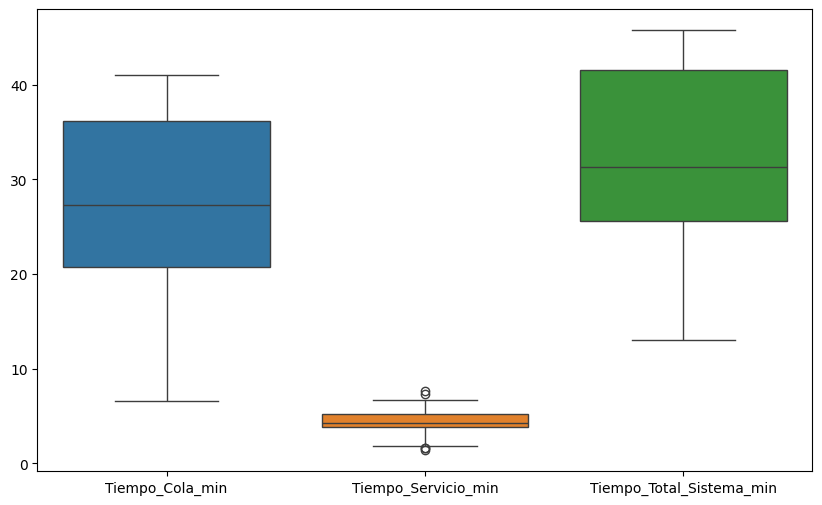

In [31]:
# Box plot to identify outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final[['Tiempo_Cola_min', 'Tiempo_Servicio_min', 'Tiempo_Total_Sistema_min']])
plt.show()

In [32]:
def detect_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f'Number of outliers in {column_name}: {outliers.shape[0]}')

    return outliers

detect_outliers_iqr(df_final, 'Tiempo_Cola_min')
detect_outliers_iqr(df_final, 'Tiempo_Total_Sistema_min')
outliers = detect_outliers_iqr(df_final, 'Tiempo_Servicio_min')
outliers

Number of outliers in Tiempo_Cola_min: 0
Number of outliers in Tiempo_Total_Sistema_min: 0
Number of outliers in Tiempo_Servicio_min: 5


,entrada_dt,llegada_pico_dt,salida_dt,Tiempo_Cola_min,Tiempo_Servicio_min,Tiempo_Total_Sistema_min
7,1900-01-01 07:24:17,1900-01-01 07:41:38,1900-01-01 07:43:01,17.350000,1.383333,18.733333
8,1900-01-01 07:34:50,1900-01-01 07:46:48,1900-01-01 07:48:26,11.966667,1.633333,13.600000
10,1900-01-01 07:39:45,1900-01-01 07:52:25,1900-01-01 07:54:01,12.666667,1.600000,14.266667
11,1900-01-01 07:40:24,1900-01-01 07:54:01,1900-01-01 08:01:21,13.616667,7.333333,20.950000
14,1900-01-01 07:45:51,1900-01-01 08:04:55,1900-01-01 08:12:35,19.066667,7.666667,26.733333


In [33]:
df_final = df_final.drop(outliers.index)
df.describe()

,tiempo_cola,tiempo_servicio,tiempo_total
count,62.000000,62.000000,62.000000
mean,1644.725806,262.693548,1907.419355
std,563.563666,78.564704,579.777305
min,395.000000,83.000000,780.000000
25%,1251.250000,230.750000,1533.500000
50%,1637.000000,258.000000,1879.500000
75%,2170.250000,310.500000,2493.250000
max,2460.000000,460.000000,2745.000000


In [34]:

df_final.to_csv('processed_data.csv', index=False)